# Utility Variables and Functions

In [17]:
# Import modules

# Compress warnings: everyone will be tired of warnings...
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning) 
warnings.simplefilter(action = 'ignore', category = UserWarning)
warnings.filterwarnings("ignore", message = "This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.")

import numpy as np
import pandas as pd
import math
import scipy as sp
import scipy.io
import scipy.optimize as optimize
from sympy import *
import random

import collections
from collections import OrderedDict
from collections import Counter
from itertools import compress
from itertools import groupby

import timeit
import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.collections import PolyCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
from matplotlib import colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import rgb2hex
import matplotlib.patches as mpatches

import seaborn as sns; sns.set()
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
#rcParams["axes.grid"] = False

import import_ipynb

warnings.filterwarnings("ignore", message = "This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.")

In [18]:
_Figure_PATH_ = './figures/'

# Notation Simplification

In [19]:
# Define some symbols
p_0, q_0 = symbols('p_0, q_0') # initial state
p_1, p_2, p_3, p_4 = symbols('p_1, p_2, p_3, p_4', real = True) # my probabilities to cooperate
q = symbols('q', real = True)
q_1, q_2, q_3, q_4 = symbols('q_1, q_2, q_3, q_4', real = True) # my opponent's probabilities to cooperate
R, S, T, P, O = symbols('R, S, T, P, O', real = True) # payoffs
alpha, beta, gamma = symbols('alpha, beta, gamma', real = True) # parameters for the linear equation
phi, chi, psi, sigma, kappa = symbols('phi, chi, psi, sigma, kappa', real = True) # parameters for the linear equation
a, b, c = symbols('a, b, c', real = True)

init_printing(use_unicode = True) # for the sake of good presentation of math

# me: p
ALLCorALLD_p = [(p_1, 1), (p_2, 1), (p_3, 0), (p_4, 0)]
Alternator_p = [(p_1, 0), (p_2, 0), (p_3, 1), (p_4, 1)]
AntiTitForTat_p = [(p_1, 0), (p_2, 1), (p_3, 0), (p_4, 1)]
Cooperator_p = [(p_1, 1), (p_2, 1), (p_3, 1), (p_4, 1)] 
CyclerDC_p = [(p_1, 0), (p_2, 0), (p_3, 1), (p_4, 1)]
Defector_p = [(p_1, 0), (p_2, 0), (p_3, 0), (p_4, 0)]
Desperate_p = [(p_1, 0), (p_2, 0), (p_3, 0), (p_4, 1)]
FirmButFair_p = [(p_1, 1), (p_2, 0), (p_3, 1), (p_4, 2/3)]
GTFT_p = [(p_1, 1), (p_2, 1/3), (p_3, 1), (p_4, 1/3)]
Grudger_p = [(p_1, 1), (p_2, 0), (p_3, 0), (p_4, 0)]
Hopeless_p = [(p_1, 0), (p_2, 1), (p_3, 1), (p_4, 1)]
Joss_p = [(p_1, 9/10), (p_2, 0), (p_3, 9/10), (p_4, 0)]
Negation_p = [[(p_1, 0), (p_2, 1), (p_3, 0), (p_4, 1)]]

PSOGamblerMem1_p = [(p_1, 1.0), (p_2, 0.52173487), (p_3, 0), (p_4, 0.12050939)]
PSOGambler111_C_p = [(p_1, 1.0), (p_2, 0.12304797), (p_3, 0), (p_4, 0.13581423)]
PSOGambler111_D_p = [(p_1, 1.0), (p_2, 0.57740178), (p_3, 0), (p_4, 0.11886807)]

PSOGambler222_CC_CC_p = [(p_1, 1.0), (p_2, 1.0), (p_3, 0), (p_4, 1)]
PSOGambler222_CD_CC_p = [(p_1, 0), (p_2, 0.02126434), (p_3, 1.0), (p_4, 0.0)]
PSOGambler222_CC_CD_p = [(p_1, 1.0), (p_2, 0.95280465), (p_3, 0), (p_4, 0)]
PSOGambler222_CD_CD_p = [(p_1, 0.80897541), (p_2, 0), (p_3, 0), (p_4, 0.65147565)]
PSOGambler222_DC_CD_p = [(p_1, 0.15412392), (p_2, 0.24922166), (p_3, 0), (p_4, 0)]
PSOGambler222_DD_CD_p = [(p_1, 0), (p_2, 0), (p_3, 0), (p_4, 0.24523149)]
# PSO Gambler 2_2_2
# opponent's initial two steps: CC
#[1, 5, 17, 21]: [1.0, 1.0, 0.0, 1.0]
#[9, 13, 25, 29]: [0, 0.02126434, 1.0, 0.0]
#[33, 37, 49, 53]: [0, 0, 0, 0] Defector
#[41, 45, 57, 61]: [0, 0, 0, 1] Desperate
# opponent's initial two steps: CD
#[2, 6, 18, 22]: [1, 0.95280465, 0, 0]
#[10, 14, 26, 30]: [0.80897541, 0.0, 0.0, 0.65147565]
#[34, 38, 50, 54]: [0.15412392, 0.24922166, 0, 0]
#[42, 46, 58, 62]: [0, 0, 0, 0.24523149]

Random_p = [(p_1, 1/2), (p_2, 1/2), (p_3, 1/2), (p_4, 1/2)]
RandomTitForTat_p = [(p_1, 3/4), (p_2, 1/4), (p_3, 3/4), (p_4, 1/4)]
SoftJoss_p = [(p_1, 1), (p_2, 1/10), (p_3, 1), (p_4, 1/10)]
StochasticCooperator_p = [(p_1, 0.935), (p_2, 0.229), (p_3, 0.266), (p_4, 0.42)] # [0.935, 0.229, 0.266, 0.42]
TitForTat_p = [(p_1, 1), (p_2, 0), (p_3, 1), (p_4, 0)]
Willing_p = [(p_1, 1), (p_2, 1), (p_3, 1), (p_4, 0)]
WinShiftLoseStay_p = [(p_1, 0), (p_2, 1), (p_3, 1), (p_4, 0)]
WinStayLoseShift_p = [(p_1, 1), (p_2, 0), (p_3, 0), (p_4, 1)]
ZDExtort2_p = [(p_1, 8/9), (p_2, 1/2), (p_3, 1/3), (p_4, 0)]
ZDGEN2_p = [(p_1, 1), (p_2, 9/16), (p_3, 1/2), (p_4, 1/8)]
ZDMischief_p = [(p_1, 0.8), (p_2, 0.6), (p_3, 0.1), (p_4, 0)]
ZDSET2_p = [(p_1, 3/4), (p_2, 1/4), (p_3, 1/2), (p_4, 1/4)]

# my opponent: q
ALLCorALLD_q = [(q_1, 1), (q_2, 1), (q_3, 0), (q_4, 0)]
Alternator_q = [(q_1, 0), (q_2, 0), (q_3, 1), (q_4, 1)]
AntiTitForTat_q = [(q_1, 0), (q_2, 1), (q_3, 0), (q_4, 1)]
Cooperator_q = [(q_1, 1), (q_2, 1), (q_3, 1), (q_4, 1)] 
CyclerDC_q = [(q_1, 0), (q_2, 0), (q_3, 1), (q_4, 1)]
Defector_q = [(q_1, 0), (q_2, 0), (q_3, 0), (q_4, 0)]
Desperate_q = [(q_1, 0), (q_2, 0), (q_3, 0), (q_4, 1)]
FirmButFair_q = [(q_1, 1), (q_2, 0), (q_3, 1), (q_4, 2/3)]
GTFT_q = [(q_1, 1), (q_2, 1/3), (q_3, 1), (q_4, 1/3)]
Grudger_q = [(q_1, 1), (q_2, 0), (q_3, 0), (q_4, 0)]
Hopeless_q = [(q_1, 0), (q_2, 1), (q_3, 1), (q_4, 1)]
Joss_q = [(q_1, 9/10), (q_2, 0), (q_3, 9/10), (q_4, 0)]
Negation_q = [(q_1, 0), (q_2, 1), (q_3, 0), (q_4, 1)]

PSOGamblerMem1_q = [(q_1, 1.0), (q_2, 0.52173487), (q_3, 0), (q_4, 0.12050939)]
PSOGambler111_C_q = [(q_1, 1.0), (q_2, 0.12304797), (q_3, 0), (q_4, 0.13581423)]
PSOGambler111_D_q = [(q_1, 1.0), (q_2, 0.57740178), (q_3, 0), (q_4, 0.11886807)]

PSOGambler222_CC_CC_q = [(q_1, 1.0), (q_2, 1.0), (q_3, 0), (q_4, 1)]
PSOGambler222_CD_CC_q = [(q_1, 0), (q_2, 0.02126434), (q_3, 1.0), (q_4, 0.0)]
PSOGambler222_CC_CD_q = [(q_1, 1.0), (q_2, 0.95280465), (q_3, 0), (q_4, 0)]
PSOGambler222_CD_CD_q = [(q_1, 0.80897541), (q_2, 0), (q_3, 0), (q_4, 0.65147565)]
PSOGambler222_DC_CD_q = [(q_1, 0.15412392), (q_2, 0.24922166), (q_3, 0), (q_4, 0)]
PSOGambler222_DD_CD_q = [(q_1, 0), (q_2, 0), (q_3, 0), (q_4, 0.24523149)]
PSOGambler222_CD_DC_q = [(q_1, 0), (q_2, 0.43278586), (q_3, 0.23563137), (q_4, 1.0)]
PSOGambler222_DD_DC_q = [(q_1, 0.00227615), (q_2, 0), (q_3, 0), (q_4, 1)]
PSOGambler222_CC_DD_q = [(q_1, 0), (q_2, 0), (q_3, 0.15140743), (q_4, 0)]
PSOGambler222_DD_DD_q = [(q_1, 0), (q_2, 1), (q_3, 0.77344942), (q_4, 0)]
# opponent's initial two steps: DC
#[3, 7, 19, 23]: [1.0, 0, 1.0, 0] Tit For Tat
#[11, 15, 27, 31]: [0, 0.43278586, 0.23563137, 1]
#[35, 39, 51, 55]: [1.0, 1.0, 0, 0] ALLCorALLD
#[43, 47, 59, 63]: [0.00227615, 0, 0, 1] 
# opponent's initial two steps: DD
#[4, 8, 20, 24]: [0, 0, 0.15140743, 0]
#[12, 16, 28, 32]: [0, 0, 0, 0] Defector
#[36, 40, 52, 56]: [0, 0, 0, 1] Desperate
#[44, 48, 60, 64]: [0, 1, 0.77344942, 0]

Random_q = [(q_1, 1/2), (q_2, 1/2), (q_3, 1/2), (q_4, 1/2)]
RandomTitForTat_q = [(q_1, 3/4), (q_2, 1/4), (q_3, 3/4), (q_4, 1/4)]
SoftJoss_q = [(q_1, 1), (q_2, 1/10), (q_3, 1), (q_4, 1/10)]
StochasticCooperator_q = [(q_1, 0.935), (q_2, 0.229), (q_3, 0.266), (q_4, 0.42)]
TitForTat_q = [(q_1, 1), (q_2, 0), (q_3, 1), (q_4, 0)]
Willing_q = [(q_1, 1), (q_2, 1), (q_3, 1), (q_4, 0)]
WinShiftLoseStay_q = [(q_1, 0), (q_2, 1), (q_3, 1), (q_4, 0)]
WinStayLoseShift_q = [(q_1, 1), (q_2, 0), (q_3, 0), (q_4, 1)]
ZDExtort2_q = [(q_1, 8/9), (q_2, 1/2), (q_3, 1/3), (q_4, 0)]
ZDGEN2_q = [(q_1, 1), (q_2, 9/16), (q_3, 1/2), (q_4, 1/8)]
ZDMischief_q = [(q_1, 0.8), (q_2, 0.6), (q_3, 0.1), (q_4, 0)]
ZDSET2_q = [(q_1, 3/4), (q_2, 1/4), (q_3, 1/2), (q_4, 1/4)]


A_1 = Matrix([[-1 + p_1*q_1, -1 + p_1, -1 + q_1, 1], # matrix for the determinant D(p, q, 1)
              [p_2*q_3, -1 + p_2, q_3, 1],
             [p_3*q_2, p_3, -1 + q_2, 1],
             [p_4*q_4, p_4, q_4, 1]])
A_X = Matrix([[-1 + p_1*q_1, -1 + p_1, -1 + q_1, R], # matrix for the determinant D(p, q, S_X)
              [p_2*q_3, -1 + p_2, q_3, S],
             [p_3*q_2, p_3, -1 + q_2, T],
             [p_4*q_4, p_4, q_4, P]])
A_Y = Matrix([[-1 + p_1*q_1, -1 + p_1, -1 + q_1, R], # matrix for the determinant D(p, q, S_Y)
              [p_2*q_3, -1 + p_2, q_3, T],
             [p_3*q_2, p_3, -1 + q_2, S],
             [p_4*q_4, p_4, q_4, P]])

s_X = A_X.det()/A_1.det() # my payoff
s_Y = A_Y.det()/A_1.det() # my opponent's payoff

phi_upper_con = 1/(chi*(T - P) + (P - S)) # the range of phi is 0 < phi < phi_upper_con # 2P < T + S
phi_upper_abn = 1/(chi*(P - S) + (T - P)) # the range of phi is 0 < phi < phi_upper_abn # 2P > T + S

# the probabilities of an Extortion Strategy
P_1 = 1 - (R - P)*phi*(chi - 1)
P_2 = 1 - phi*((T - P)*chi + (P - S))
P_3 = phi*((P - S)*chi + (T - P))
P_4 = phi*(P - P)

In [20]:
payoff_con_subs = [(R, 3), (S, 0), (T, 5), (P, 1)] # payments of the conventional IPD wtih 2P < T + S
payoff_abn_subs = [(R, 1), (S, -3), (T, 2), (P, 0)] # payments of an IPD with 2P > T + S
payoff_eqn_subs = [(R, 3), (S, 0), (T, 5), (P, 2.5)] # payments of an IPD with 2P = T + S
payoff_insane_subs = [(R, 2.35), (S, 0), (T, 2.4), (P, 1)] # payments of an IPD with R \approx T, 2P < T + S

## Monotonicity of the Payoff

In [21]:
# ALLCorALLD_q
# Alternator_q: inc with chi, inc with phi
# AntiTitForTat_q: inc with chi, dec with phi
# Cooperator_q: inc with chi, con with phi
# CyclerDC_q: inc with chi, inc with phi
# Defector_q: con with chi, con with phi
# Desperate_q: inc with chi, con with phi
# FirmButFair_q: dec with chi, dec with phi
# GTFT_q: dec with chi, inc with phi
# Grudger_q: con with chi, con with phi
# Hopeless_q: inc with chi, dec with phi
# Joss_q: con with chi, con with phi
# Negation_q: inc with chi, dec with phi

# PSOGamblerMem1_q: dec with chi, con with phi
# PSOGambler111_C_q: first dec with chi, con with phi
# PSOGambler111_D_q: dec with chi, con with phi

# PSOGambler222_CC_CC_q: inc with chi, con with phi
# PSOGambler222_CD_CC_q: con with chi, con with phi (q_4 = 0)
# PSOGambler222_CC_CD_q: con with chi, con with phi
# PSOGambler222_CD_CD_q: inc with chi, con with phi
# PSOGambler222_DC_CD_q: con with chi, con with phi
# PSOGambler222_DD_CD_q: inc with chi, con with phi

# PSOGambler222_CD_DC_q: inc with chi, almost con with phi
# PSOGambler222_DD_DC_q: inc with chi, con with phi
# PSOGambler222_CC_DD_q: con with chi, con with phi
# PSOGambler222_DD_DD_q: con with chi, con with phi

# Random_q: inc with chi, con with phi
# RandomTitForTat_q: dec with chi, inc with phi
# SoftJoss_q: dec with chi, inc with phi
# StochasticCooperator_q: dec with chi, dec with phi
# TitForTat_q: con with chi, con with phi
# Willing_q: inc with chi, con with phi
# WinShiftLoseStay_q: con with chi, con with phi
# WinStayLoseShift_q: inc with chi, con with phi
# ZDExtort2_q:
# ZDGEN2_q:
# ZDMischief_q:
# ZDSET2_q

In [22]:
# If the value is between 0 and 1, accept it. If it is less than 0, make it 0. If it is greater than 1, make it 1.
def truncation(value):
    flag = True
    if value < 0:
        flag = False
        return 0, flag
    elif value > 1:
        flag = False
        return 1, flag
    else:
        return value, flag 
    
# Apply the truncation function to a list
def truncation_list(Z):
    ZZ = []
    FF = []
    for i in range(0, len(Z)):
        value, flag = truncation(Z[i])
        ZZ.append(value)
        FF.append(flag)
    return ZZ, FF

# Apply the truncation function to an array
def truncation_array(Z):
    ZZ = []
    FF = []
    for i in range(0, Z.shape[0]):
        for j in range(0, Z.shape[1]):
            value, flag = truncation(Z[i][j])
            ZZ.append(value)
            FF.append(flag)
    ZZ, FF = np.array(ZZ), np.array(FF)
    ZZ, FF = np.resize(ZZ,Z.shape), np.resize(FF,Z.shape)
    return ZZ, FF

# Plotting

In [23]:
# Contour plot of s_X with respect to chi and phi
def s_X_2D_contour(s_X, payoff_subs, phi_upper, q_subs, cmap, tag):
    lam_phi_upper = lambdify([chi], phi_upper.subs(payoff_subs))
    chi_subs = np.linspace(1, 10, 501) # 501
    lam_s_X = lambdify([chi, phi], s_X.subs(payoff_subs + q_subs))
    ZD_points = []
    for chi_value in chi_subs:
        for phi_value in np.linspace(0.001, lam_phi_upper(chi_value), 501): # 501
            ZD_points.append([chi_value, phi_value, lam_s_X(chi_value, phi_value)])
    xdata = [item[0] for item in ZD_points] # chi
    ydata = [item[1] for item in ZD_points] # phi
    zdata = [item[2] for item in ZD_points] # s_X
    fig = plt.figure()
    fig.patch.set_facecolor('white')
    plt.xlabel(r'$\chi$')
    plt.ylabel(r'$\phi$')
    plt.scatter(xdata, ydata, c = zdata, cmap = cmap, marker = ',', alpha=0.5)
    plt.title(r'$q = $' + str([q_subs[0][1], q_subs[1][1], q_subs[2][1], q_subs[3][1]]), fontsize = 10)
    plt.colorbar()
    #plt.savefig("payoff_2D_contour" + str(tag) + ".png", dpi = 400, facecolor = fig.get_facecolor(), edgecolor = 'none')
    plt.show()

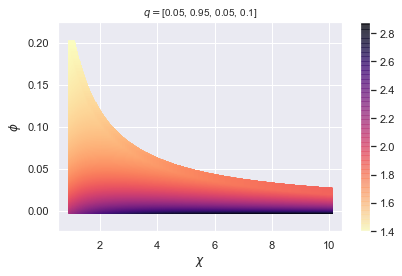

In [13]:
#s_X_2D_contour(s_X.subs([(p_1, P_1), (p_2, P_2), (p_3, P_3), (p_4, P_4)]), 
               #payoff_subs = payoff_con_subs, phi_upper = phi_upper_con, 
               #q_subs = [(q_1, 0.05), (q_2, 0.95), (q_3, 0.05), (q_4, 0.1)], cmap = 'magma_r', tag = 1)

In [24]:
# 3D surface of s_X with respect to chi and phi
def s_X_3D(s_X, payoff_subs, phi_upper, q_subs, cmap, tag):
    lam_phi_upper = lambdify([chi], phi_upper.subs(payoff_subs))
    lam_flag = lambdify([chi, phi], phi_upper.subs(payoff_subs) - phi)
    lam_s_X = lambdify([chi, phi], cancel(s_X.subs(q_subs)).subs(payoff_subs))
    error = 1e-2
    X = np.linspace(1 + error, 5, 801)
    Y = np.linspace(error, lam_phi_upper(1 + error), 801)
    X, Y = np.meshgrid(X, Y)
    Z = lam_s_X(X, Y)
    indices = lam_flag(X, Y) <= 0 # where phi > phi_upper
    for i in range(0, indices.shape[0]):
        for j in range(0, indices.shape[1]):
            if indices[i][j] == True:
                X[i][j] = X[i][j-1]
                Y[i][j] = Y[i][j-1]
                Z[i][j] = Z[i][j-1]

    fig = plt.figure()
    fig.patch.set_facecolor('white')
    ax = fig.gca(projection = '3d')
    surf = ax.plot_surface(X, Y, Z, cmap = cmap, edgecolor = 'none', alpha = 0.8)
    ax.contour(X, Y, Z, 10, cmap = cmap, linestyles = "solid", offset = Z.min() - 0.1)
    if tag == 'A_abn_1':
        def truncate_colormap(cmap, minval = 0.0, maxval = 1.0, n = 100):
            new_cmap = mcolors.LinearSegmentedColormap.from_list('trunc({n},{a:.2f},{b:.2f})'.format(n = cmap.name, a = minval, b = maxval),
                                                                cmap(np.linspace(minval, maxval, n)))
            return new_cmap
        new_cmap = truncate_colormap(plt.get_cmap(cmap), 0.3, 0.2)
        X = np.linspace(1,5,501)
        Y = np.linspace(error, lam_phi_upper(1 + error), 501)
        X, Y = np.meshgrid(X, Y)
        ZZ = np.ones(X.shape)*payoff_subs[3][1] # add the plane of z = P
        ax.plot_surface(X, Y, ZZ, cmap = new_cmap, edgecolor = 'none', alpha = 0.4)
    #ax.contour(X, Y, Z, 10, cmap=cmap, linestyles="solid")
    #cset = ax.contour(X, Y, Z, zdir='x', offset=-5, cmap=cm.Spectral)
    #cset = ax.contour(X, Y, Z, zdir='y', offset=-5, cmap=cm.Spectral)
    ax.set_xlim3d(1, 5)
    ax.set_xlabel(r'$\chi$')
    ax.set_ylim3d(0, lam_phi_upper(1 + error))
    ax.set_ylabel(r'$\phi$')
    ax.set_zlim3d(Z.min() - 0.1, Z.max())
    ax.set_zlabel(r'ZD' + '\u2019' + 's ' + 'payoff $s_X$')
    ax.set_title(r'$q = $' + str([q_subs[0][1], q_subs[1][1], q_subs[2][1], q_subs[3][1]]),fontsize=10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.1)
    ax.spines['left'].set_linewidth(0.1)
    plt.locator_params(nbins = 5)
    fig.colorbar(surf, shrink = 0.5, aspect = 10)
    # rotate it
    #ax.view_init(60)
    plt.savefig(_Figure_PATH_ + 'payoff_3D_' + str(tag) + '.png', dpi = 400, facecolor = fig.get_facecolor(), edgecolor = 'none', transparent = True, bbox_inches = 'tight')
    plt.show()

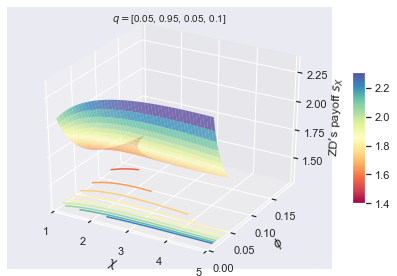

In [25]:
#s_X_3D(s_X.subs([(p_1, P_1), (p_2, P_2), (p_3, P_3), (p_4, P_4)]), 
       #payoff_subs = payoff_con_subs, phi_upper = phi_upper_con, 
       #q_subs = [(q_1, 0.05), (q_2, 0.95), (q_3, 0.05), (q_4, 0.1)], cmap = 'Spectral', tag = 1)

In [26]:
# 3D surface of s_Y with respect to chi and phi
def s_Y_3D(s_Y, payoff_subs, phi_upper, q_subs, cmap, tag):
    lam_phi_upper = lambdify([chi], phi_upper.subs(payoff_subs))
    lam_flag = lambdify([chi, phi], phi_upper.subs(payoff_subs) - phi)
    lam_s_Y = lambdify([chi, phi], cancel(s_Y.subs(q_subs)).subs(payoff_subs))
    error = 5e-3
    X = np.linspace(1 + error, 5, 801)
    Y = np.linspace(error, lam_phi_upper(1 + error), 801)
    X, Y = np.meshgrid(X, Y)
    Z = lam_s_Y(X, Y)
    indices = lam_flag(X, Y) <= 0 # where phi > phi_upper
    for i in range(0, indices.shape[0]):
        for j in range(0, indices.shape[1]):
            if indices[i][j] == True:
                X[i][j] = X[i][j-1]
                Y[i][j] = Y[i][j-1]
                Z[i][j] = Z[i][j-1]

    fig = plt.figure()
    fig.patch.set_facecolor('white')
    ax = fig.gca(projection = '3d')
    surf = ax.plot_surface(X, Y, Z, cmap = cmap, edgecolor = 'none', alpha = 0.8)
    ax.contour(X, Y, Z, 10, cmap = cmap, linestyles = "solid", offset = Z.min() - 0.1)
    if tag == 'A_abn_1':
        def truncate_colormap(cmap, minval = 0.0, maxval = 1.0, n = 100):
            new_cmap = mcolors.LinearSegmentedColormap.from_list('trunc({n},{a:.2f},{b:.2f})'.format(n = cmap.name, a = minval, b = maxval),
                                                                cmap(np.linspace(minval, maxval, n)))
            return new_cmap
        new_cmap = truncate_colormap(plt.get_cmap(cmap), 0.3, 0.2)
        X = np.linspace(1,5,501)
        Y = np.linspace(error, lam_phi_upper(1 + error), 501)
        X, Y = np.meshgrid(X, Y)
        ZZ = np.ones(X.shape)*payoff_subs[3][1] # add the plane of z = P
        ax.plot_surface(X, Y, ZZ, cmap = new_cmap, edgecolor = 'none', alpha = 0.4)
    ax.set_xlim3d(1, 5)
    ax.set_xlabel(r'$\chi$')
    ax.set_ylim3d(0, lam_phi_upper(1 + error))
    ax.set_ylabel(r'$\phi$')
    ax.set_zlim3d(Z.min() - 0.1, Z.max())
    ax.set_zlabel(r'Opponent' + '\u2019' + 's ' + 'payoff $s_Y$')
    ax.set_title(r'$q = $' + str([q_subs[0][1], q_subs[1][1], q_subs[2][1], q_subs[3][1]]),fontsize = 10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.1)
    ax.spines['left'].set_linewidth(0.1)
    plt.locator_params(nbins=5)
    fig.colorbar(surf, shrink=0.5, aspect=10)
    plt.savefig(_Figure_PATH_ + 'payoff_3D_Y_' + str(tag) + '.png', dpi = 400, facecolor = fig.get_facecolor(), edgecolor = 'none', transparent = True, bbox_inches = 'tight')
    plt.show()

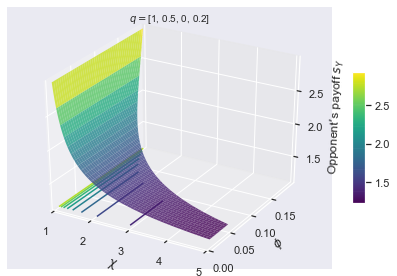

In [27]:
#s_Y_3D(s_Y.subs([(p_1, P_1), (p_2, P_2), (p_3, P_3), (p_4, P_4)]), 
       #payoff_subs = payoff_con_subs, phi_upper = phi_upper_con, 
       #q_subs = [(q_1, 1), (q_2, 0.5), (q_3, 0), (q_4, 0.2)], cmap = 'viridis', tag = 'A_con')

In [27]:
# Quadrilateral plot
# include arrows 
# cannot show the trace
def payoff_quad(s_X, s_Y, payoff_subs, q_subs, tag, chi_1 = 1, ms = 5, fs = 10):
    
    rr, ss = payoff_subs[0][1], payoff_subs[1][1]
    tt, pp = payoff_subs[2][1], payoff_subs[3][1]
    #if tag[0]=='A':
        #lam_s_X = lambdify([chi], cancel(s_XA.subs(q_subs)).subs(payoff_subs))
        #lam_s_Y = lambdify([chi], cancel(s_YA.subs(q_subs)).subs(payoff_subs))
    lam_s_X = lambdify([chi], cancel(s_X.subs(q_subs)).subs(payoff_subs))
    lam_s_Y = lambdify([chi], cancel(s_Y.subs(q_subs)).subs(payoff_subs))
    
    s_X_0, s_Y_0 = lam_s_X(1), lam_s_Y(1)
    s_X_1, s_Y_1 = lam_s_X(chi_1), lam_s_Y(chi_1)
    s_X_2, s_Y_2 = lam_s_X(1e10), lam_s_Y(1e10)
    
    fig = plt.figure()
    fig.patch.set_facecolor('white')
    plt.xlabel(r'$s_X$')
    plt.ylabel(r'$s_Y$')
    
    points = [[ss, tt], [rr, rr], [tt, ss], [pp, pp]]
    polygon = plt.Polygon(points, ec = None, alpha = 0.2)
    plt.gca().add_patch(polygon)
    
    p1 = plt.plot(ss, tt, marker = '.', markersize = ms)
    plt.text(ss + 0.5, tt - 0.2, '(S, T)', fontsize = fs)
    p3 = plt.plot(tt, ss, c = '#1f77b4', marker = '.', markersize = ms)
    plt.text(tt - 1, ss, '(T, S)', fontsize = fs)
    
    plt.text(rr + 0.2, rr + 0.2, '(R, R)', fontsize = fs)
    plt.text(pp - 0.5, pp - 0.5, '(P, P)', fontsize = fs)
    
    # The line point from (R, R) to (P, P)
    line_0 = plt.Line2D((rr, pp), (rr, pp), lw = 2, ls = ':', marker = '.', markersize = 5)
    plt.gca().add_line(line_0)

    plt.plot(s_X_0, s_Y_0, c = 'r', marker = '.', markersize = ms)
    plt.plot(s_X_2, s_Y_2, c = 'r', marker = '.', markersize = ms)
    
    if tag!= 'A_abn_1':
        #line = plt.Line2D((s_X_0, s_X_2), (s_Y_0, s_Y_2), lw = 0, c = 'r', ls = '-', marker = '.', 
        #markersize = 5, markerfacecolor = 'r', markeredgecolor = 'r', alpha = 0.8)
        #plt.gca().add_line(line)
        dx = s_X_2 - s_X_0
        dy = s_Y_2 - s_Y_0
        arrow = plt.Arrow(s_X_0, s_Y_0, dx, dy, ec='r', fc='r', width=0.3, alpha=0.8)
        plt.gca().add_patch(arrow)
    
    else:
        #line = plt.Line2D((s_X_0, s_X_1, s_X_2), (s_Y_0, s_Y_1, s_Y_2), lw = 0, c = 'r', ls = '-', marker = '.', 
        #markersize = 5, markerfacecolor = 'r', markeredgecolor = 'r', alpha = 0.8)
        #plt.gca().add_line(line)
        plt.plot(s_X_1, s_Y_1, c = 'r', marker = '.', markersize = ms)
        
        dx = s_X_2 - s_X_1
        dy = s_Y_2 - s_Y_1
        arrow = plt.Arrow(s_X_1, s_Y_1, dx, dy, ec = 'r', fc = 'r', width = 0.3, alpha = 0.8)
        plt.gca().add_patch(arrow)
        dx = s_X_1 - s_X_0
        dy = s_Y_1 - s_Y_0
        arrow = plt.Arrow(s_X_0, s_Y_0, dx, dy, ec = 'r', fc = 'r', width = 0.3, alpha = 0.8)
        plt.gca().add_patch(arrow)
    
    plt.axis('scaled')
    plt.title(r'$q = $' + str([q_subs[0][1], q_subs[1][1], q_subs[2][1], q_subs[3][1]]),fontsize = fs)
    plt.savefig(_Figure_PATH_ + 'payoff_quad_' + str(tag) + '.png', dpi = 400, facecolor = fig.get_facecolor(), edgecolor = 'none', bbox_inches = 'tight')
    plt.show()

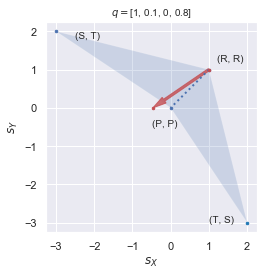

In [28]:
#payoff_quad(s_X = cancel(s_X.subs([(p_1, P_1), (p_2, P_2), (p_3, P_3), (p_4, P_4)] + [(q_1, 1), (q_3, 0)])), 
            #s_Y = cancel(s_Y.subs([(p_1, P_1), (p_2, P_2), (p_3, P_3), (p_4, P_4)] + [(q_1, 1), (q_3, 0)])), 
            #payoff_subs = payoff_abn_subs, q_subs = [(q_1, 1), (q_2, 0.1), (q_3, 0), (q_4, 0.8)], tag = 'A_abn_1_x')

In [29]:
# Quadrilateral plot
# do not include arrows 
# can show the trace
def payoff_quad_x(s_X, s_Y, payoff_subs, q_subs, tag, chi_1 = 1, zoom = False, ms = 5, fs = 10):
    
    prop_cycle = plt.rcParams['axes.prop_cycle'] # the default colors of python
    colors = prop_cycle.by_key()['color']
    
    rr, ss = payoff_subs[0][1], payoff_subs[1][1]
    tt, pp = payoff_subs[2][1], payoff_subs[3][1]
    
    #if tag[0]=='A':
        #lam_s_X = lambdify([chi], cancel(s_XA.subs(q_subs)).subs(payoff_subs))
        #lam_s_Y = lambdify([chi], cancel(s_YA.subs(q_subs)).subs(payoff_subs))
    
    lam_s_X = lambdify([chi], cancel(s_X.subs(q_subs)).subs(payoff_subs))
    lam_s_Y = lambdify([chi], cancel(s_Y.subs(q_subs)).subs(payoff_subs))
    
    s_X_0, s_Y_0 = lam_s_X(1), lam_s_Y(1)
    s_X_1, s_Y_1 = lam_s_X(chi_1), lam_s_Y(chi_1)
    s_X_2, s_Y_2 = lam_s_X(5), lam_s_Y(5)
    s_X_3, s_Y_3 = lam_s_X(50), lam_s_Y(50)
    
    fig = plt.figure()
    ax = plt.gca()
    fig.patch.set_facecolor('white')
    plt.xlabel(r'$s_X$')
    plt.ylabel(r'$s_Y$')
    if (tag == 'A_abn_1') | (tag == 'B_abn_2') | (tag == 'C_abn_1'):
        k = 0 # for the color
    else:
        k = 2
    if(zoom == True):
        #plt.margins(x = -0.15, y = -0.15)
        if ('con' in tag):
            plt.xlim(pp - 0.4,rr + 0.5)        
            plt.ylim(pp - 0.4,rr + 0.5)
            plt.text(pp - 0.15, pp - 0.15, '(P, P)', fontsize = fs)
            plt.text(rr + 0.05, rr + 0.05, '(R, R)', fontsize = fs)
        elif ('eqn' in tag):
            plt.xlim(pp - 0.1,rr + 0.15)        
            plt.ylim(pp - 0.1,rr + 0.15)
            plt.text(pp - 0.05, pp - 0.05, '(P, P)', fontsize = fs)
            plt.text(rr + 0.02, rr + 0.02, '(R, R)', fontsize = fs)
        elif (tag[0]=='B') | (tag == 'C_abn_1'):
            plt.xlim(pp - 0.55,pp + 0.2)        
            plt.ylim(pp - 0.55,pp + 0.2)
            plt.text(pp - 0.05, pp - 0.05, '(P, P)', fontsize = fs)
        else:
            plt.xlim(pp - 0.55,rr + 0.35)        
            plt.ylim(pp - 0.55,rr + 0.35)
            plt.text(pp - 0.15, pp - 0.15, '(P, P)', fontsize = fs)
            plt.text(rr + 0.05, rr + 0.05, '(R, R)', fontsize = fs)
        
    else:
        plt.plot(ss, tt, c = colors[k],marker = '.', markersize = ms)
        plt.plot(tt, ss, c = colors[k], marker = '.', markersize = ms)
        plt.text(ss + 0.5, tt - 0.2, '(S, T)', fontsize = fs)
        plt.text(tt - 1, ss, '(T, S)', fontsize = fs)
        plt.text(rr + 0.1, rr + 0.1, '(R, R)', fontsize = fs)
        plt.text(pp - 0.3, pp - 0.3, '(P, P)', fontsize = fs)
    
    # the quadrilateral
    points = [[ss, tt], [rr, rr], [tt, ss], [pp, pp]]
    polygon = plt.Polygon(points, color = colors[k], ec = None, alpha = 0.2/(1 + zoom/2))
    ax.add_patch(polygon)
       
    # the line pointing from (R, R) to (P, P)
    line_0 = plt.Line2D((rr, pp), (rr, pp), c = colors[k], lw = 2*(1 + zoom/2), ls = ':', marker = '.', 
                         markersize = ms*(1 + zoom/2), alpha = 0.7)
    ax.add_line(line_0)
    
    # the payoffs when chi = 1 and chi = infty
    plt.plot(s_X_0, s_Y_0, c = 'r', marker = '.', markersize = ms*(1 + zoom/2))
    plt.plot(s_X_3, s_Y_3, c = 'r', marker = '.', markersize=ms*(1 + zoom/2))
    
    # the payoffs as chi varies from 1 to infty
    chi_list = np.linspace(1, 50, 1001)
    s_X_list = lam_s_X(chi_list)
    s_Y_list = lam_s_Y(chi_list)
    p = plt.plot(s_X_list, s_Y_list, c = 'r', lw = 2*(1 + zoom/2), alpha = 0.8)
    
    # add the transaction point
    if tag == 'A_abn_1':
        plt.plot(s_X_1, s_Y_1, c = colors[k], marker = '.', markersize = ms*(1 + zoom/2))
    
    # add the arrow
    if zoom == True:
        style = "Simple, tail_width = 3, head_width = 10, head_length = 10"
        kw = dict(arrowstyle = style, color = 'r', alpha = 0.8)
        a = mpatches.FancyArrowPatch((s_X_2, s_Y_2), (s_X_3, s_Y_3), **kw )
        ax.add_patch(a)
    else:
        style = "Simple, tail_width=2, head_width=4, head_length=3"

    # equalize the scales of x-axis and y-axis
    ax.set_aspect('equal', adjustable = 'box')
    plt.title(r'$q = $' + str([q_subs[0][1], q_subs[1][1], q_subs[2][1], q_subs[3][1]]),fontsize = fs)
    if zoom==True:
        plt.savefig(_Figure_PATH_ + 'payoff_quad_' + str(tag) + '_zoom.png', dpi = 400, facecolor = fig.get_facecolor(), edgecolor = 'none', bbox_inches = 'tight')
    else:   
        plt.savefig(_Figure_PATH_ + 'payoff_quad_' + str(tag) + '.png', dpi = 400, facecolor = fig.get_facecolor(), edgecolor = 'none', bbox_inches = 'tight')
    plt.show()

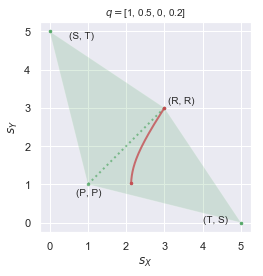

In [30]:
#payoff_quad_x(s_X = cancel(s_X.subs([(p_1, P_1), (p_2, P_2), (p_3, P_3), (p_4, P_4)] + [(q_1, 1), (q_3, 0)])), 
              #s_Y = cancel(s_Y.subs([(p_1, P_1), (p_2, P_2), (p_3, P_3), (p_4, P_4)] + [(q_1, 1), (q_3, 0)])), 
              #payoff_subs = payoff_con_subs, q_subs = [(q_1, 1), (q_2, 0.5), (q_3, 0), (q_4, 0.2)], 
              #tag = 'A_con', chi_1 = 1, zoom = False, ms = 5, fs = 10)

In [32]:
# Quadrilateral plot
# combine payoff_quad and payoff_quad_x
def payoff_quad_embed(s_X, s_Y, payoff_subs, q_subs, tag, chi_1 = 1, zoom = 1, ms = 5, fs = 10):
    
    prop_cycle = plt.rcParams['axes.prop_cycle'] # the default colors of python
    colors = prop_cycle.by_key()['color']
    
    rr,ss,tt,pp = payoff_subs[0][1], payoff_subs[1][1], payoff_subs[2][1], payoff_subs[3][1]
    
    #if tag[0]=='A':
        #lam_s_X = lambdify([chi], cancel(s_XA.subs(q_subs)).subs(payoff_subs))
        #lam_s_Y = lambdify([chi], cancel(s_YA.subs(q_subs)).subs(payoff_subs))
    
    lam_s_X = lambdify([chi], cancel(s_X.subs(q_subs)).subs(payoff_subs))
    lam_s_Y = lambdify([chi], cancel(s_Y.subs(q_subs)).subs(payoff_subs))
    
    s_X_0, s_Y_0, s_X_1, s_Y_1 = lam_s_X(1), lam_s_Y(1), lam_s_X(chi_1), lam_s_Y(chi_1)
    s_X_2, s_Y_2, s_X_3, s_Y_3 = lam_s_X(5), lam_s_Y(5), lam_s_X(50), lam_s_Y(50)
    
    fig = plt.figure()
    ax = plt.gca()
    fig.patch.set_facecolor('white')
    # equalize the scales of x-axis and y-axis
    ax.set_aspect('equal', adjustable = 'box')
    plt.title(r'$q = $' + str([q_subs[0][1], q_subs[1][1], q_subs[2][1], q_subs[3][1]]),fontsize = fs)
    plt.xlabel(r'$s_X$')
    plt.ylabel(r'$s_Y$')
    if (tag == 'A_abn_1') | (tag == 'B_abn_2') | (tag == 'C_abn_1'):
        k = 0
    else:
        k = 2
    
    plt.plot(ss, tt, c = colors[k],marker = '.', markersize = ms)
    plt.plot(tt, ss, c = colors[k], marker = '.', markersize = ms)
    plt.text(ss + 0.5, tt - 0.2, '(S, T)', fontsize = fs)
    plt.text(tt - 1, ss, '(T, S)', fontsize = fs)
    plt.text(rr + 0.1, rr + 0.1, '(R, R)', fontsize = fs)
    plt.text(pp - 0.3, pp - 0.3, '(P, P)', fontsize = fs)
    
    # the quadrilateral
    points = [[ss, tt], [rr, rr], [tt, ss], [pp, pp]]
    polygon = plt.Polygon(points, color = colors[k], ec = None, alpha = 0.2)
    ax.add_patch(polygon)
       
    # the line pointing from (R, R) to (P, P)
    line_0 = plt.Line2D((rr, pp), (rr, pp), c = colors[k], lw = 2, ls = ':', marker = '.', markersize = ms, alpha = 0.7)
    ax.add_line(line_0)
    
    # the payoffs when chi = 1 and chi = infty
    plt.plot(s_X_0, s_Y_0, c = 'r', marker = '.', markersize = ms)
    plt.plot(s_X_3, s_Y_3, c = 'r', marker = '.', markersize = ms)
    
    # the payoffs as chi varies from 1 to infty
    chi_list = np.linspace(1, 50, 1001)
    s_X_list = lam_s_X(chi_list)
    s_Y_list = lam_s_Y(chi_list)
    p = plt.plot(s_X_list, s_Y_list, c = 'r', lw = 2, alpha = 0.8)
    
    # add the transaction point
    if tag == 'A_abn_1':
        plt.plot(s_X_1, s_Y_1, c = colors[k], marker = '.', markersize = ms)
    
    # this is an inset axes over the main axes
    a = plt.axes([0.25, 0.2, 0.3, 0.3])
    if (tag[0] == 'B') | (tag == 'C_abn_1'):
        plt.xlim(pp - 0.6,pp + 0.15)        
        plt.ylim(pp - 0.6,pp + 0.15)
    else:
        plt.xlim(pp - 0.65,rr + 0.15)        
        plt.ylim(pp - 0.65,rr + 0.15)
        
    # the quadrilateral
    polygon = plt.Polygon(points, color = colors[k], ec = None, alpha = 0.2/(1 + zoom/2))
    a.add_patch(polygon)       
    # the line point from (R, R) to (P, P)
    line_0 = plt.Line2D((rr, pp), (rr, pp), c = colors[k], lw = 2*(1 + zoom/2), ls = ':', marker = '.', markersize = ms*(1 + zoom/2), alpha = 0.7)
    a.add_line(line_0)
    # the payoffs as chi varies from 1 to infty
    chi_list = np.linspace(1, 50, 1001)
    s_X_list = lam_s_X(chi_list)
    s_Y_list = lam_s_Y(chi_list)
    p = plt.plot(s_X_list, s_Y_list, c = 'r', lw = 2*(1 + zoom/2), alpha = 0.8)
    # the arrow indicates the direction
    if (tag[0] == 'B') | (tag == 'C_abn_1'):
        a.arrow(s_X_2, s_Y_2, s_X_3 - s_X_2, s_Y_3 - s_Y_2, head_width = 0.05, head_length = 0.1, color = 'r', alpha = 0.8)
    else:
        a.arrow(s_X_2, s_Y_2, s_X_3 - s_X_2, s_Y_3 - s_Y_2, head_width = 0.1, head_length = 0.2, color = 'r', alpha = 0.8)
    
    # add the transaction point
    if tag == 'A_abn_1':
        plt.plot(s_X_1, s_Y_1, c = colors[k], marker = '.', markersize = ms*(1 + zoom/2))

    plt.xticks([])
    plt.yticks([])
    a.set_aspect('equal', adjustable = 'box')
    plt.savefig(_Figure_PATH_ + 'payoff_quad_' + str(tag) + '_embed.png', dpi = 400, facecolor = fig.get_facecolor(), edgecolor = 'none', bbox_inches = 'tight')
    plt.show()

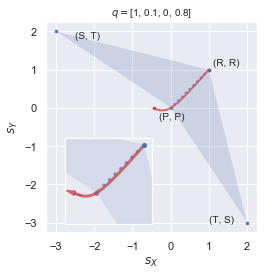

In [33]:
#payoff_quad_embed(s_X = cancel(s_X.subs([(p_1, P_1), (p_2, P_2), (p_3, P_3), (p_4, P_4)] + [(q_1, 1), (q_3, 0)])), 
                  #s_Y = cancel(s_Y.subs([(p_1, P_1), (p_2, P_2), (p_3, P_3), (p_4, P_4)] + [(q_1, 1), (q_3, 0)])), 
                  #payoff_subs = payoff_abn_subs, q_subs = [(q_1, 1), (q_2, 0.1), (q_3, 0), (q_4, 0.8)], 
                  #tag = 'A_abn_1', chi_1 = 1, zoom = 1, ms = 5, fs = 10)

In [35]:
def s_X_2D(s_X, s_Y, payoff_subs, phi_upper, q_subs_list, tag, fs = 20):
    
    color_maps = ['Blues', 'Oranges', 'Greens', 'Reds']
    color_maps_line = [cm.Blues, cm.Oranges, cm.Greens, cm.Reds]
    
    l = len(q_subs_list)
    xdata_list, ydata_list, zdata_list, zzdata_list, fdata_list, fdata_false_list = [None]*l, [None]*l, [None]*l, [None]*l, [None]*l, [None]*l
    for i in range(0,l):
        q_subs = q_subs_list[i]
        # lambdify my payoff and my opponent's payoff
        lam_s_X = lambdify([p_1, p_2, p_3, p_4], cancel(s_X.subs(q_subs)).subs(payoff_subs))
        lam_s_Y = lambdify([p_1, p_2, p_3, p_4], cancel(s_Y.subs(q_subs)).subs(payoff_subs))
        # lambdify the upper bound
        lam_phi_upper = lambdify([chi], phi_upper.subs(payoff_subs))
        # lambdify my own strategy
        lam_P_1 = lambdify([chi, phi], cancel(P_1.subs(payoff_subs)))
        lam_P_2 = lambdify([chi, phi], cancel(P_2.subs(payoff_subs)))
        lam_P_3 = lambdify([chi, phi], cancel(P_3.subs(payoff_subs)))
        lam_P_4 = lambdify([chi, phi], cancel(P_4.subs(payoff_subs)))
        error = 1e-2
        if tag == 'chi' or tag == 'chi_both':
            X = np.linspace(1 + error, 10, 501)
            Y = 0.5*lam_phi_upper(10)
        elif tag == 'phi' or tag == 'phi_both':
            X = 2 # chi
            Y = np.linspace(error, 1.5*lam_phi_upper(X), 501) # phi
        else:
            X = np.linspace(1 + error, 10, 301)
            Y = np.linspace(error, 1.5*lam_phi_upper(1+error), 301) # phi
    
        X, Y = np.meshgrid(X, Y)
        
        Z_1, Z_2, Z_3, Z_4 = lam_P_1(X, Y), lam_P_2(X, Y), lam_P_3(X, Y), lam_P_4(X, Y)
        Z_1, F_1 = truncation_array(Z_1)
        Z_2, F_2 = truncation_array(Z_2)
        Z_3, F_3 = truncation_array(Z_3)
        F = np.multiply(F_1, F_2)
        F = np.multiply(F, F_3)
        Z = lam_s_X(Z_1, Z_2, Z_3, Z_4) # my payoff
        ZZ = lam_s_Y(Z_1, Z_2, Z_3, Z_4) # my opponent's payoff
        

        xdata, ydata, zdata, zzdata, fdata = X.flatten(), Y.flatten(), Z.flatten(), ZZ.flatten(), F.flatten()
        #fdata_false = [i for i in range(0, fdata.size) if fdata[i] == False]
        fdata_false = [not i for i in fdata]
        #ssize = [20]*(fdata.size - len(fdata_false)) + [20]*len(fdata_false)
        xdata_list[i], ydata_list[i], zdata_list[i] =  xdata, ydata, zdata
        zzdata_list[i], fdata_list[i], fdata_false_list[i] = zzdata, fdata, fdata_false
    
    fig = plt.figure(figsize=(10, 8))
    fig.patch.set_facecolor('white')
    palette = plt.get_cmap('tab10')
    for i in range(0, l):
        q_subs = q_subs_list[i]
        q_subs_print = [round(item[1],4) for item in q_subs]
        xdata, ydata, zdata, zzdata = xdata_list[i], ydata_list[i], zdata_list[i], zzdata_list[i]
        fdata, fadata_false = fdata_list[i], fdata_false_list[i]
        if tag == 'chi':
            plt.xlabel(r'$\chi$', fontsize = fs - 2)
            plt.ylabel(r'$s_X$', fontsize = fs - 2)
            #plt.scatter(xdata, zdata, c = xdata, cmap = cmap, s = ssize)
            plt.plot(xdata, zdata, linewidth = 3, color = palette(i), label = q_subs_print) # color = color_maps_line[i](0.8)
            #plt.colorbar()
            plt.title(r'$\phi = $' + str(round(ydata[0], 4)),fontsize = fs)
        elif tag == 'phi':
            plt.xlabel(r'$\phi$', fontsize = fs - 2)
            plt.ylabel(r'$s_X$', fontsize = fs - 2)
            plt.title(r'$\chi = $' + str(xdata[0]),fontsize = fs)
            plt.plot(list(compress(ydata, fdata)), list(compress(zdata, fdata)), color = palette(i),
                 linestyle = '-', linewidth = 3, label = q_subs_print)
            plt.plot(list(compress(ydata, fdata_false)), list(compress(zdata, fdata_false)), color = palette(i),
                 linestyle = '--', linewidth = 3)
        elif tag == 'chi_both':
            plt.xlabel(r'$s_X$', fontsize = fs - 2)
            plt.ylabel(r'$s_Y$', fontsize = fs - 2)
            plt.plot(zdata, zzdata, linewidth = 3, color = palette(i), label = q_subs_print)
            plt.title(r'$\phi = $' + str(round(ydata[0], 4)),fontsize = fs)
        elif tag == 'phi_both':
            plt.xlabel(r'$s_X$', fontsize = fs - 2)
            plt.ylabel(r'$s_Y$', fontsize = fs - 2)
            plt.plot(list(compress(zdata, fdata)), list(compress(zzdata, fdata)), color = palette(i),
                 linestyle = '-', linewidth = 3, label = q_subs_print)
            plt.plot(list(compress(zdata, fdata_false)), list(compress(zzdata, fdata_false)), color = palette(i),
                 linestyle = '--', linewidth = 3)
            plt.title(r'$\chi = $' + str(xdata[0]),fontsize = fs)
    plt.xticks(fontsize = fs - 4)
    plt.yticks(fontsize = fs - 4)
    plt.legend(loc='upper center', ncol=2,  fancybox=True, fontsize = fs - 4)
    plt.tight_layout()
    #plt.title(r'$q = $' + str([q_subs[0][1], q_subs[1][1], q_subs[2][1], q_subs[3][1]]),fontsize = 10)
    plt.show()

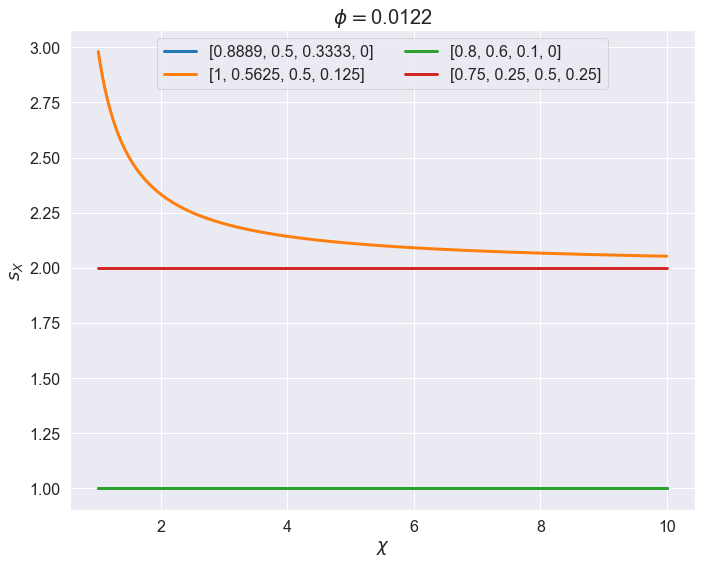

In [36]:
#s_X_2D(s_X = s_X, s_Y = s_Y, payoff_subs = payoff_con_subs, phi_upper = phi_upper_con, 
       #q_subs_list =  [ZDExtort2_q, ZDGEN2_q,  ZDMischief_q, ZDSET2_q], tag = 'chi', fs = 20)

In [1]:
# monotonicity of s_X and s_Y with respect to chi and phi
#s_X_2D(s_X = s_X, s_Y = s_Y, payoff_subs = payoff_con_subs, phi_upper = phi_upper_con, 
       #q_subs_list =  [ZDExtort2_q, ZDGEN2_q,  ZDMischief_q, ZDSET2_q], tag = 'chi_both', fs = 20)

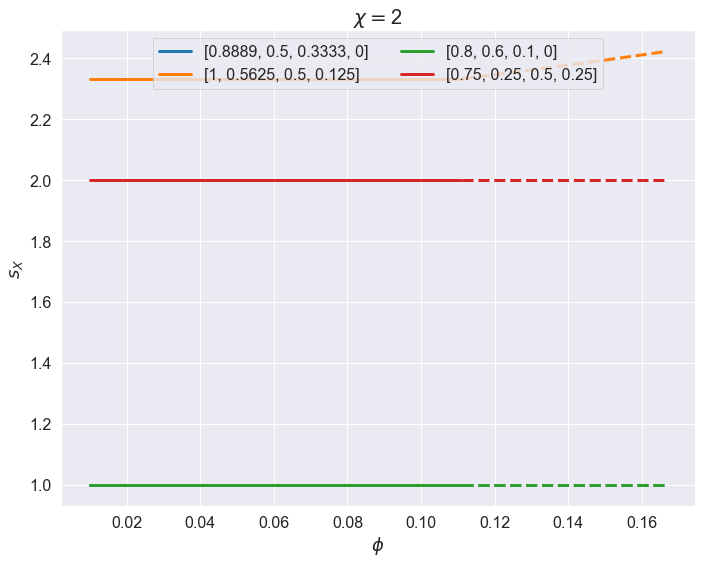

In [38]:
#s_X_2D(s_X = s_X, s_Y = s_Y, payoff_subs = payoff_con_subs, phi_upper = phi_upper_con, 
       #q_subs_list =  [ZDExtort2_q, ZDGEN2_q,  ZDMischief_q, ZDSET2_q], tag = 'phi', fs = 20)

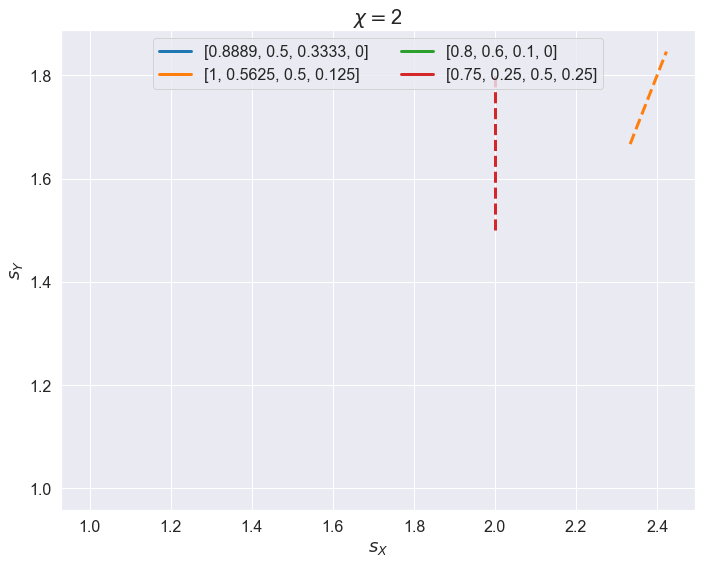

In [39]:
#s_X_2D(s_X = s_X, s_Y = s_Y, payoff_subs = payoff_con_subs, phi_upper = phi_upper_con, 
       #q_subs_list =  [ZDExtort2_q, ZDGEN2_q,  ZDMischief_q, ZDSET2_q], tag = 'phi_both', fs = 20)

In [42]:
new_colors = ['C0', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', 
              '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# 1D plot of s_X with respect to chi
def s_X_1D(s_X, s_Y, payoff_subs, q_subs_list, names_list, 
           chi_list_positive, chi_list_negative = [], fs = 15, tag = "", index = 0, job = 'X'):
    s_X = simplify(s_X.subs(payoff_subs))
    s_Y = simplify(s_Y.subs(payoff_subs))
    #chi_list = np.linspace(chi_min, 10, 501)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    if job == 'X':
        for i, q_subs in enumerate(q_subs_list):
            s_X_temp = cancel(simplify(s_X.subs(q_subs)))
            s_X_list = [s_X_temp.subs(chi, chi_value) for chi_value in chi_list_positive]
            ax.plot(chi_list_positive, s_X_list, color = new_colors[i], label = names_list[i])
            s_X_list = [s_X_temp.subs(chi, chi_value) for chi_value in chi_list_negative]
            ax.plot(chi_list_negative, s_X_list, color = new_colors[i], label = None)
        
    elif job == 'XY':
        i, q_subs = 0, q_subs_list[0]
        if tag == 'con_X':
            s_X = cancel(s_X.subs([(q_1, 1), (q_2, 1)]))
            s_Y = cancel(s_Y.subs([(q_1, 1), (q_2, 1)]))
        if tag == 'con_A':
            s_X = cancel(s_X.subs([(q_1, 1), (q_3, 0)]))
            s_Y = cancel(s_Y.subs([(q_1, 1), (q_3, 0)]))
        elif tag == 'con_B':
            s_X = cancel(s_X.subs([(q_2, 0), (q_3, 0)]))
            s_Y = cancel(s_Y.subs([(q_2, 0), (q_3, 0)]))
        elif tag == 'con_C':
            s_X = cancel(s_X.subs([(q_2, q_1), (q_3, q_1)]))
            s_Y = cancel(s_Y.subs([(q_2, q_1), (q_3, q_1)]))
        elif tag == 'con_D':
            s_X = cancel(s_X.subs(q_4, (-(T + S - 2*P)*q_1 + (R - P)*(q_2 + q_3) + T - R - P + S)/(2*R - T - S)).subs(payoff_subs))
            s_Y = cancel(s_Y.subs(q_4, (-(T + S - 2*P)*q_1 + (R - P)*(q_2 + q_3) + T - R - P + S)/(2*R - T - S)).subs(payoff_subs))
        s_X = cancel(simplify(s_X.subs(q_subs)))
        s_Y = cancel(simplify(s_Y.subs(q_subs)))
        s_X_list = [s_X.subs(chi, chi_value) for chi_value in chi_list_positive]
        s_Y_list = [s_Y.subs(chi, chi_value) for chi_value in chi_list_positive]
        ax.plot(chi_list_positive, s_X_list, color = new_colors[index], linestyle = '-', label = r'$s_X$')
        ax.plot(chi_list_positive, s_Y_list, color = new_colors[index], linestyle = '--', label = r'$s_Y$')
        s_X_list = [s_X.subs(chi, chi_value) for chi_value in chi_list_negative]
        s_Y_list = [s_Y.subs(chi, chi_value) for chi_value in chi_list_negative]
        ax.plot(chi_list_negative, s_X_list, color = new_colors[index], linestyle = '-', label = None)
        ax.plot(chi_list_negative, s_Y_list, color = new_colors[index], linestyle = '--', label = None)
        #ax.plot([], [], color = 'none', label = names_list[i])
        #handles, labels = plt.gca().get_legend_handles_labels() # get existing handles and labels

    plt.xlabel(r'extortion factor $\chi$', fontsize = fs - 2)
    if job == 'X':
        plt.ylabel(r'ZD' + '\u2019' + 's ' + 'payoff $s_X$', fontsize = fs - 2)
    else:
        plt.ylabel('Payoff', fontsize = fs - 2)
    plt.legend(loc = 'upper right', fancybox = True, fontsize = fs - 4)
    title = [payoff_subs[0][1], payoff_subs[1][1], payoff_subs[2][1], payoff_subs[3][1]]
    title = [str(v) for v in title]
    title = ', '.join(title) 
    plt.title(r'$(R, S, T, P) = ($' + title + ')' + (lambda x: '    ' + names_list[0] if x == 'XY' else '')(job), fontsize = fs - 2)
    plt.savefig(_Figure_PATH_ + tag + ".png", dpi = 400, bbox_inches='tight') # facecolor = fig.get_facecolor(), edgecolor = 'none', 

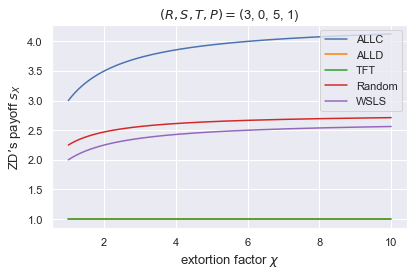

In [41]:
#s_X_temp = simplify(s_X.subs([(p_1, P_1), (p_2, P_2), (p_3, P_3), (p_4, P_4)]))
#s_Y_temp = simplify(s_Y.subs([(p_1, P_1), (p_2, P_2), (p_3, P_3), (p_4, P_4)]))
#s_X_1D(s_X_temp, s_Y_temp, payoff_con_subs, [Cooperator_q, Defector_q, TitForTat_q, Random_q, WinStayLoseShift_q], 
       #['ALLC', 'ALLD', 'TFT', 'Random', 'WSLS'], np.linspace(1, 10, 501), [], 15, 'con_common_strategies')

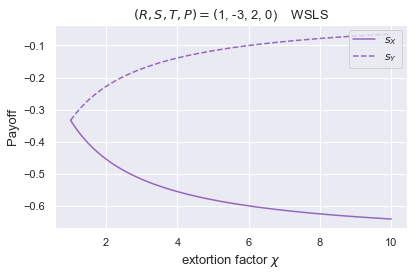

In [43]:
#s_X_1D(s_X_temp, s_Y_temp, payoff_abn_subs, [WinStayLoseShift_q], ['WSLS'], 
       #np.linspace(1, 10, 501), [], 15, 'con_wsls', 4, 'XY')

# Four Different Classes

### Class A: 
### $q_1 = 1$, $q_3 = 0$.

In [44]:
def target_A_plot(s_X, payoff_subs, name, zoom = False, fs = 15):
    
    num, deno = fraction(factor(diff(s_X, chi)))
    target  = cancel(num/((T - S)*(R - P)*q_4))
    target = collect(target, chi)
    e_2 = collect(target.coeff(chi, 2), q_4)
    e_1 = collect(target.coeff(chi, 1), q_4)
    e_0 = collect(target.coeff(chi, 0), q_4)
    
    if (2*payoff_subs[3][1] <= payoff_subs[2][1] + payoff_subs[1][1]): # 2P <= T + S
        f = lambdify([q_2, q_4], e_2.subs(payoff_subs), 'numpy')
    else:
        f = lambdify([q_2, q_4], (e_2 + e_1 + e_0).subs(payoff_subs), 'numpy')
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.patch.set_facecolor('white')
    x = np.linspace(0, 1, 501)
    y = np.linspace(0, 1, 501)
    if(zoom == True):
        x = np.linspace(0.75, 1, 501)
        y = np.linspace(0, 0.05, 501)
    X, Y = np.meshgrid(x, y)
    plt.imshow(f(X, Y) > 0, extent = (X.min(),X.max(),Y.min(),Y.max()), origin = "lower", cmap = "Pastel1")
    plt.xlabel(r'$q_2$', fontsize = fs - 2)
    plt.ylabel(r'$q_4$', fontsize = fs - 2) 
    Z = f(X, Y)
    contours = plt.contour(X, Y, Z, 5, colors = 'black')
    plt.clabel(contours, inline = True, fontsize = 8, fmt = '%1.2f')
    if(zoom == True):
        plt.imshow(Z, extent = [0.75, 1, 0, 0.05], origin = 'lower', cmap = 'Spectral', alpha = 0.4)
        ax.set_aspect(5)
    else:
        plt.imshow(Z, extent = [0, 1, 0, 1], origin = 'lower', cmap = 'Spectral', alpha = 0.4)
    plt.colorbar()
    title = [payoff_subs[0][1], payoff_subs[1][1], payoff_subs[2][1], payoff_subs[3][1]]
    title = [str(v) for v in title]
    title = ', '.join(title) 
    plt.title(r'$(R, S, T, P) = ($' + title + ')', fontsize = fs - 2)
    if(name == 'con'):
        plt.text(0.55, 0.05, r'$s_X \curvearrowright$ with $\chi$', size = fs, horizontalalignment = 'center')
    plt.axis(aspect = 'image')
    if(zoom == True):
        plt.savefig(_Figure_PATH_ + "target_A_" + name + "_zoom.png", dpi = 400, bbox_inches = 'tight')
    else:
        plt.savefig(_Figure_PATH_ + "target_A_" + name + ".png", dpi = 400, bbox_inches = 'tight')
    plt.show()   

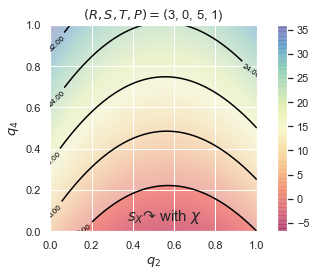

In [45]:
#target_A_plot(s_X = collect(cancel(s_X.subs([(p_1, P_1), (p_2, P_2), (p_3, P_3), (p_4, P_4)] + [(q_1, 1), (q_3, 0)])), chi), 
              #payoff_subs = payoff_con_subs, name = 'con', zoom = False, fs = 15)

In [54]:
# DG standing for donation game
def target_dg_plot(s_X, ratio, fs = 15):
    
    # differentiate my payoff, which takes the form of a rational function
    diff_s_X = simplify(cancel(diff(s_X, chi)))
    # only keep the numerator as the denominator is a square
    numerator, denominator = simplify(fraction(diff_s_X))
    numerator = factor(numerator)
    denominator = factor(denominator)
    
    target = collect(numerator/(q_4*(b - c)*(b + c)), chi)

    e_2 = collect(target.coeff(chi, 2), q_4)
    e_1 = collect(target.coeff(chi, 1), q_4)
    e_0 = collect(target.coeff(chi, 0), q_4)

    e_21 = collect(factor(e_2.coeff(q_4, 1)), q_2)
    e_20 = factor(e_2.coeff(q_4, 0))
    
    h = -e_20/e_21
    h = h.subs([(b, ratio), (c, 1)])
    fig = plt.figure()
    fig.patch.set_facecolor('white')
    xvals = np.arange(0, 1, 0.01) # 
    yvals = [h.subs(q_2, x) for x in xvals]
    f = lambdify([q_2, q_4], q_4 - h, 'numpy')
    d = np.linspace(0,1,2001)
    xvals,yvals = np.meshgrid(d,d)
    plt.imshow( f(xvals, yvals) > 0, extent = (xvals.min(), xvals.max(), yvals.min(), yvals.max()), origin = "lower", cmap = "Pastel1")
    plt.xlabel(r'$q_2$')
    plt.ylabel(r'$q_4$')
    x = np.linspace(0, 1, 50)
    y = np.linspace(0, 1, 50)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    contours = plt.contour(X, Y, Z, 5, colors = 'black')
    plt.clabel(contours, inline = True, fontsize = 8, fmt = '%1.1f')
    plt.imshow(Z, extent = [0, 1, 0, 1], origin = 'lower',
               cmap = 'Spectral', alpha = 0.4)
    plt.colorbar()
    if(ratio < 4):
        plt.text(0.6, 0.05, r'$s_X \curvearrowright$ with $\chi$', size = fs, horizontalalignment = 'center')
    plt.axis(aspect='image')
    plt.savefig(_Figure_PATH_ + "target_dg_" + str(int(ratio)) + ".png", dpi = 150)
    plt.show()

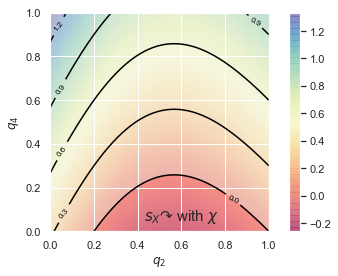

In [55]:
#s_X_temp = simplify(s_X.subs([(p_1, P_1), (p_2, P_2), (p_3, P_3), (p_4, P_4)] + [(q_1, 1), (q_3, 0)])).subs([(R, b - c), (S, -c), (T, b), (P, 0)])
#target_dg_plot(s_X = s_X_temp, ratio = 2, fs = 15) # ratio = 2, 4, 8, 16

### Class C: 
### $q_1 = q_2 = q_3$.

In [46]:
def target_C_plot(s_X, payoff_subs, name, zoom = False, fs = 15):
    
    num, deno = fraction(factor(diff(s_X, chi)))
    target = factor(num/((T - S)*q_4))
    f = lambdify([q_1, q_4], target.subs(payoff_subs), 'numpy')
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.patch.set_facecolor('white')
    x = np.linspace(0, 1, 501)
    y = np.linspace(0, 1, 501)
    if(zoom == True):
        x = np.linspace(0.75, 1, 501)
        y = np.linspace(0, 0.05, 501)
    X, Y = np.meshgrid(x, y)
    plt.imshow(f(X, Y) > 0, extent = (X.min(),X.max(),Y.min(),Y.max()),origin = "lower", cmap = "Pastel1")
    plt.xlabel(r'$q_1$')
    plt.ylabel(r'$q_4$')   
    Z = f(X, Y)
    contours = plt.contour(X, Y, Z, 5, colors = 'black')
    plt.clabel(contours, inline = True, fontsize = 8, fmt = '%1.2f')
    if(zoom == True):
        plt.imshow(Z, extent = [0.75, 1, 0, 0.05], origin = 'lower', cmap = 'Spectral', alpha = 0.4)
        ax.set_aspect(5)
    else:
        plt.imshow(Z, extent = [0, 1, 0, 1], origin = 'lower', cmap = 'Spectral', alpha = 0.4)
    plt.colorbar()
    title = [payoff_subs[0][1], payoff_subs[1][1], payoff_subs[2][1], payoff_subs[3][1]]
    title = [str(v) for v in title]
    title = ', '.join(title) 
    plt.title(r'$(R, S, T, P) = ($' + title + ')', fontsize = fs - 2)
    if(name == 'con'):
        plt.text(0.7, 0.02, r'$s_X \curvearrowright$ with $\chi$', size = fs, horizontalalignment = 'center')
    plt.axis(aspect='image')
    if(zoom == True):
        plt.savefig(_Figure_PATH_ + "target_C_" + name + "_zoom.png", dpi = 400, bbox_inches = 'tight')
    else:
        plt.savefig(_Figure_PATH_ + "target_C_" + name + ".png", dpi = 400, bbox_inches = 'tight')
    plt.show()

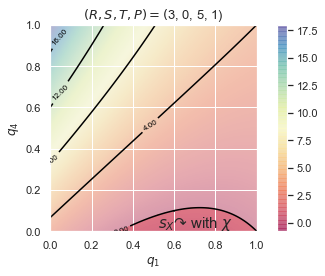

In [47]:
#target_C_plot(s_X = cancel(s_X.subs([(p_1, P_1), (p_2, P_2), (p_3, P_3), (p_4, P_4)] + [(q_2, q_1), (q_3, q_1)])), 
              #payoff_subs = payoff_con_subs, name = 'con', zoom = False, fs = 15)

### Class D: 
### $q_4 = h_D$.

In [48]:
def target_D_plot(s_X, h_D, payoff_subs, name, ms = 5, fs = 10):
    
    num, deno = fraction(factor(diff(s_X, chi)))
    target = factor(num/(T - S))
    d_D0, a_D0 = factor_list(target)[1][0][0], factor_list(target)[0]*factor_list(target)[1][1][0]
    
    f = lambdify([q_1, q_2, q_3], d_D0.subs(payoff_subs), 'numpy')
    g = lambdify([q_1, q_2, q_3], a_D0.subs(payoff_subs), 'numpy')
    hd = lambdify([q_1, q_2, q_3], h_D.subs(payoff_subs), 'numpy')
    points = []
    X = np.linspace(0, 1, 161)
    Y = np.linspace(0, 1, 161)
    Z = np.linspace(0, 1, 161)
    for x in X:
        for y in Y:
            for z in Z:
                if f(x,y,z) <= 0:
                    if g(x,y,z) >= 0:
                        points.append([x, y, z, f(x,y,z), g(x,y,z), hd(x,y,z)])
    fig = plt.figure()
    fig.patch.set_facecolor('white')
    ax = fig.gca(projection='3d')
    xdata = [item[0] for item in points]
    ydata = [item[1] for item in points]
    zdata = [item[2] for item in points]
    colors = [item[5] for item in points]
    
    # when d_0 = 0 and q_1 = 1
    XD1 = [item[0] for item in points if (abs(item[0] - 1 + item[3]) < 1e-3)]
    YD1 = [item[1] for item in points if (abs(item[0] - 1 + item[3]) < 1e-3)]
    ZD1 = [item[2] for item in points if (abs(item[0] - 1 + item[3]) < 1e-3)]
    ZD1_pr = [1 for item in points if (abs(item[0] - 1 + item[3]) < 1e-3)]
    cD1 = [item[5] for item in points if (abs(item[0] - 1 + item[3]) < 1e-3)]
    
    # when a_0 = 0 and q_1 = 1
    XA1 = [item[0] for item in points if (item[0] - 1 - item[4] == 0)]
    YA1 = [item[1] for item in points if (item[0] - 1 - item[4] == 0)]
    ZA1 = [item[2] for item in points if (item[0] - 1 - item[4] == 0)]
    cA1 = [item[5] for item in points if (item[0] - 1 - item[4] == 0)]
    
    # when d_0 = 0 and q_2 = 0
    XD2 = [item[0] for item in points if (abs(-item[1] + item[3]) < 1e-3)]
    YD2 = [item[1] for item in points if (abs(-item[1] + item[3]) < 1e-3)]
    ZD2 = [item[2] for item in points if (abs(-item[1] + item[3]) < 1e-3)]
    ZD2_pr = [1 for item in points if (abs(-item[1] + item[3]) < 1e-3)]
    cD2 = [item[5] for item in points if (abs(-item[1] + item[3]) < 1e-3)]
    
    # when a_0 = 0 and q_2 = 0
    XA2 = [item[0] for item in points if (-item[1] - item[4] == 0)]
    YA2 = [item[1] for item in points if (-item[1] - item[4] == 0)]
    ZA2 = [item[2] for item in points if (-item[1] - item[4] == 0)]
    cA2 = [item[5] for item in points if (-item[1] - item[4] == 0)]
    
    # when d_0 = 0 and q_3 = 1
    XD3 = [item[0] for item in points if (abs(item[2] - 1 + item[3]) < 1e-3)]
    YD3 = [item[1] for item in points if (abs(item[2] - 1 + item[3]) < 1e-3)]
    ZD3 = [item[2] for item in points if (abs(item[2] - 1 + item[3]) < 1e-3)]
    cD3 = [item[5] for item in points if (abs(item[2] - 1 + item[3]) < 1e-3)]
    
    # when q_2 = 0 and q_3 = 1
    XB1 = [item[0] for item in points if (item[2] - 1 - item[1] == 0)]
    YB1 = [item[1] for item in points if (item[2] - 1 - item[1] == 0)]
    ZB1 = [item[2] for item in points if (item[2] - 1 - item[1] == 0)]
    cB1 = [item[5] for item in points if (item[2] - 1 - item[1] == 0)]
    
    # when q_1 = 1 and q_3 = 1
    XB2 = [item[0] for item in points if (item[0] - 1 + item[2] - 1 == 0)]
    YB2 = [item[1] for item in points if (item[0] - 1 + item[2] - 1 == 0)]
    ZB2 = [item[2] for item in points if (item[0] - 1 + item[2] - 1 == 0)]
    cB2 = [item[5] for item in points if (item[0] - 1 + item[2] - 1 == 0)]
    
    # when d_0 = a_0 = 0
    XB = [item[0] for item in points if (abs(item[3] - item[4]) < 1e-3)]
    YB = [item[1] for item in points if (abs(item[3] - item[4]) < 1e-3)]
    ZB = [item[2] for item in points if (abs(item[3] - item[4]) < 1e-3)]
    ZB_pr = [1 for item in points if (abs(item[3] - item[4]) < 1e-3)]
    cB = [item[5] for item in points if (abs(item[3] - item[4]) < 1e-3)]
        
    def truncate_colormap(cmap, minval = 0.0, maxval = 1.0, n = 100):
        new_cmap = mcolors.LinearSegmentedColormap.from_list(
            'trunc({n},{a:.2f},{b:.2f})'.format(n = cmap.name, a = minval, b = maxval),
            cmap(np.linspace(minval, maxval, n)))
        return new_cmap
    
    
    cmap = cm.get_cmap('viridis_r')
    new_cmap = truncate_colormap(cmap, 0, 0.6)
    cmap_p = cm.get_cmap('magma_r')
    
        
    
    surf = ax.scatter(xdata, ydata, zdata, s = 0.01, alpha = 0.2, c = colors, cmap = new_cmap, rasterized = True)
    #proj_D = ax.scatter3D(YD0, XD0, ZD0, c = colorsD, cmap = cmap_x, rasterized = True, alpha = 0.3)
    #proj_A = ax.scatter3D(YA0, XA0, ZA0, c = colorsA, cmap = cmap_x, rasterized = True, alpha = 0.3)
    
    
    # L = [(T - P)q_1 - (T - R)]/(R - P)
    if(name != 'abn'):
        ax.plot3D(XB, YB, ZB, c = cmap_p(0.2), linewidth = 2, rasterized = True)  
    else:
        ax.plot3D(XB, YB, ZB, c = cmap_p(0.2), linestyle = ':', linewidth = 2, rasterized = True)
        # q_3 = 1 and a_0 = 0
        XA3 = [item[0] for item in points if (item[2] - 1 - item[4] == 0)]
        YA3 = [item[1] for item in points if (item[2] - 1 - item[4] == 0)]
        ZA3 = [item[2] for item in points if (item[2] - 1 - item[4] == 0)]
        cA3 = [item[5] for item in points if (item[2] - 1 - item[4] == 0)]
        ax.plot3D(XA3, YA3, ZA3, c = cmap_p(0.2), linewidth = 2, rasterized = True)
    
    ax.plot3D(XD3, YD3, ZD3, c = cmap(0.9), rasterized = True)
    
    ax.plot3D(XD2, YD2, ZD2, c = cmap(0.9), rasterized = True)
    ax.plot3D(XD2, YD2, ZD2_pr, c = cmap(0.9), linestyle = ':', rasterized = True)
    
    ax.plot3D(XA2, YA2, ZA2, c = cmap(0.9), rasterized = True)
        
    ax.plot3D(XD1, YD1, ZD1, c = cmap(0.9), rasterized = True)
    ax.plot3D(XD1, YD1, ZD1_pr, c = cmap(0.9), linestyle = ':', rasterized = True)
        
    ax.plot3D(XA1, YA1, ZA1, c = cmap(0.9), rasterized = True)
    
    ax.plot3D(XB1, YB1, ZB1, c = cmap(0.9), rasterized = True)
    ax.plot3D(XB2, YB2, ZB2, c = cmap(0.9), rasterized = True)
    
    # projections
    ax.plot3D(XB, YB, ZB_pr, c = cmap_p(0.2), linestyle = ':', linewidth = 2, rasterized = True)
    # single point
    ax.plot([XB[0]], [YB[0]], [1], markerfacecolor = cmap(0.9), markeredgecolor = cmap(0.9), marker = 'o', markersize = ms)
    
    title = [payoff_subs[0][1], payoff_subs[1][1], payoff_subs[2][1], payoff_subs[3][1]]
    title = [str(v) for v in title]
    title = ', '.join(title) 
    ax.set_title(r'$(R, S, T, P) = ($' + title + ')', fontsize = 10)
    
    #plt.colorbar(surf)
    ax.set_xlim3d(0, 1)
    ax.set_xlabel(r'$q_1$')
    ax.set_ylim3d(0, 1)
    ax.set_ylabel(r'$q_2$')
    ax.set_zlim3d(0, 1)
    ax.set_zlabel(r'$q_3$')
    #plt.gca().invert_yaxis()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.1)
    ax.spines['left'].set_linewidth(0.1)
    
    plt.locator_params(nbins = 5)
    fig.colorbar(surf, shrink = 0.5, aspect = 10)
    plt.savefig(_Figure_PATH_ + "target_D_" + name + ".png", dpi=400, transparent = True, bbox_inches = 'tight')

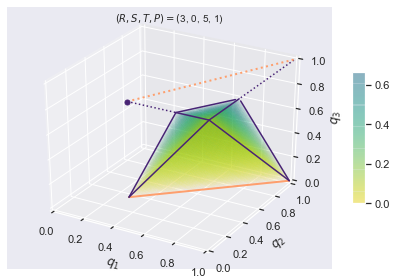

In [49]:
#s_XZD = s_X.subs([(p_1, P_1), (p_2, P_2), (p_3, P_3), (p_4, P_4)])
#num, deno = fraction(factor(s_XZD.subs(phi, phi_upper_con) - s_XZD.subs(phi, phi_upper_con/2)))
#target_zero = factor(num/(chi*q_4*(T - S)*(T*chi - P*chi + P - S)*(P*chi - S*chi + T - P)))
#factor_1 = factor_list(target_zero)[1][0][0]
#factor_0 = factor_list(target_zero)[1][1][0]*factor_list(target_zero)[0]
#h_D = collect(collect(collect(solve(factor_0, q_4)[0], q_3), q_2), q_1)
#target_D_plot(s_X = cancel(s_XZD.subs(q_4, h_D)), h_D = h_D, 
              #payoff_subs = payoff_con_subs, name = 'con')

In [50]:
# Wave plot of s_X: change q_4
# q in Class A
def payoff_poly(s_X, q_2_sub, fs = 15):
    fig = plt.figure()
    fig.patch.set_facecolor('white')
    ax = fig.gca(projection='3d')
    cmap = cm.get_cmap('Spectral')
    xs = np.arange(1, 10, 0.05)
    verts = []
    zs = [0.1, 0.3, 0.5, 0.7, 0.9] # the values of q_4
    for z in zs:
        ys = [s_X.subs([(chi, x),(q_2, q_2_sub),(q_4, z)]) for x in xs]
        ys = np.asarray(ys, dtype = np.float32)
        ys[0], ys[-1] = 1, 1
        verts.append(list(zip(xs, ys)))
    poly = PolyCollection(verts, facecolors = [cmap(z) for z in zs])
    poly.set_alpha(0.6)
    ax.add_collection3d(poly, zs=zs, zdir='y')

    ax.set_xlabel(r'extortion factor $\chi$')
    ax.set_xlim3d(1, 10)
    ax.set_ylabel(r'$q_4$')
    ax.set_ylim3d(-0.1, 1.0)
    ax.set_zlabel(r'ZD' + '\u2019' + 's ' + 'payoff $s_X$')
    ax.set_zlim3d(1, 4)
    ax.set_title(r'$q_2 = $' + str(q_2_sub),fontsize = fs)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.1)
    ax.spines['left'].set_linewidth(0.1)
    plt.savefig(_Figure_PATH_ + 'poly_con_' + str(int(10*q_2_sub)) + '.png', dpi = 400, facecolor = fig.get_facecolor(), edgecolor = 'none', transparent = True)
    plt.show()

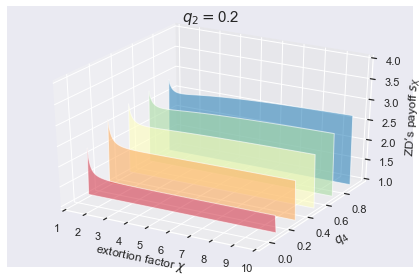

In [51]:
#s_X_temp = s_X.subs([(p_1, P_1), (p_2, P_2), (p_3, P_3), (p_4, P_4)] + [(q_1, 1), (q_3, 0)])
#s_X_temp = s_X_temp.subs(phi, phi_upper_con)
#s_X_temp = s_X_temp.subs(payoff_con_subs)
#payoff_poly(s_X = s_X_temp, q_2_sub = 0.2, fs = 15) # q_2_sub = 0.2, 0.4, 0.6, 0.8

In [52]:
# Wave plot of s_X: change q_4
# q in Class B
def payoff_poly_abn(s_X, S_sub, fs = 15):
    fig = plt.figure()
    fig.patch.set_facecolor('white')
    ax = fig.gca(projection='3d')
    cmap = cm.get_cmap('Spectral')
    xs = np.arange(1, 10, 0.05)
    verts = []
    zs = [0.1, 0.3, 0.5, 0.7, 0.9]
    for z in zs:
        ys = [s_X.subs([(chi, x),(S, S_sub),(q_4, z)]) for x in xs]
        ys = np.asarray(ys, dtype = np.float32)
        ys[0], ys[-1] = (S_sub**2 - 4)/(S_sub - 4), (S_sub**2 - 4)/(S_sub - 4)
        verts.append(list(zip(xs, ys)))
    poly = PolyCollection(verts, facecolors = [cmap(z) for z in zs])
    poly.set_alpha(0.6)
    ax.add_collection3d(poly, zs = zs, zdir = 'y')

    ax.set_xlabel(r'extortion factor $\chi$')
    ax.set_xlim3d(1, 10)
    ax.set_ylabel(r'$q_4$')
    ax.set_ylim3d(0, 1.0)
    ax.set_zlabel(r'ZD' + '\u2019' + 's ' + 'payoff $s_X$')
    ax.set_zlim3d((S_sub**2 - 4)/(S_sub - 4), 0)
    ax.set_title(r'$S = $' + str(S_sub),fontsize = fs)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.1)
    ax.spines['left'].set_linewidth(0.1)
    plt.savefig(_Figure_PATH_ + 'poly_abn_' + str(abs(S_sub)) + '.png', dpi = 400, facecolor = fig.get_facecolor(), edgecolor = 'none', transparent = True)
    plt.show()
    

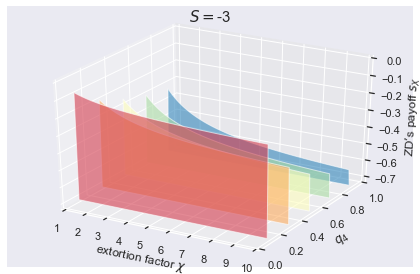

In [53]:
#s_X_temp = s_X.subs([(p_1, P_1), (p_2, P_2), (p_3, P_3), (p_4, P_4)] + [(q_2, 0), (q_3, 0)])
#s_X_temp = s_X_temp.subs(phi, phi_upper_abn)
#s_X_temp = simplify(cancel(s_X_temp.subs([(R, 1),(T, 2), (P, 0)])))
#payoff_poly_abn(s_X = s_X_temp, S_sub = -3, fs = 15) # S_sub = -3, -5, -10, -20